<center><h1>Characterizing and predicting early reviews for effective product marketing on e- commerce</h1></center>

### Importing Modules

In [2]:
!pip install textblob

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [4]:
df=pd.read_csv('dataset.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


### Understanding Dataset

In [88]:
df.shape

(162969, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [8]:
df.columns

Index(['clean_text', 'category'], dtype='object')

### Missing Values Treatment

In [89]:
df.isna().sum()

clean_text         0
category           0
sentiment_label    0
dtype: int64

In [10]:
df=df.dropna()

### Duplicates Treatment

In [11]:
df.duplicated().sum()

0

### Data Preparation

In [12]:
df['sentiment_label'] = df['category'].apply(lambda x: 'Negative' if x == -1 else 'Neutral' if x == 0 else 'Positive')

In [13]:
df.head()

,clean_text,category,sentiment_label
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


### Data Summary

In [14]:
df.describe()

,category
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
df.describe(include='object')

,clean_text,sentiment_label
count,162969,162969
unique,162969,3
top,mathura bjp hema malini has said will dangerou...,Positive
freq,1,72249


In [97]:
hep = df.loc[df.category == "sentiment"]

corr_mat_hep = hep.corr()
corr_mat_hep

,category
category,NaN


### Exploratory Data Analysis

In [39]:
category_counts = df['category'].value_counts()
sentiment_counts = df['sentiment_label'].value_counts()


<AxesSubplot:ylabel='category'>

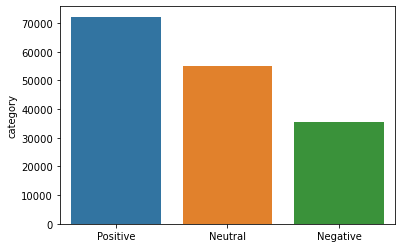

In [40]:
sns.barplot(x=sentiment_counts.index,y= category_counts)

<AxesSubplot:ylabel='Density'>

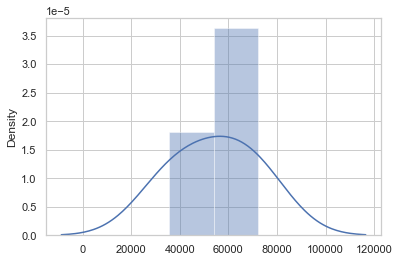

In [139]:
sns.distplot(x=sentiment_counts.values)

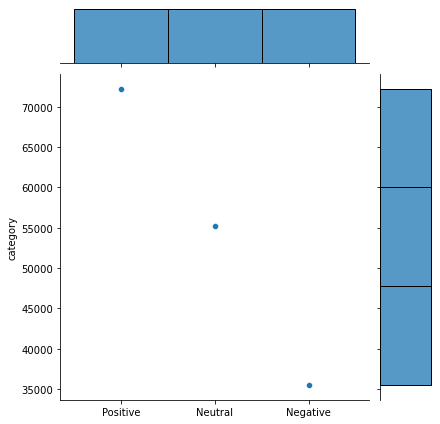

In [42]:
sns.jointplot(x=sentiment_counts.index,y= category_counts)

<AxesSubplot:ylabel='category'>

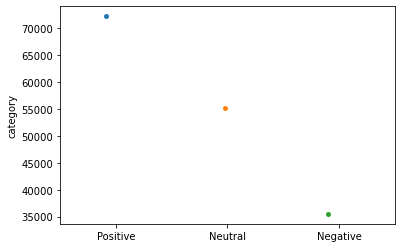

In [43]:
sns.stripplot(x=sentiment_counts.index,y= category_counts)

<AxesSubplot:ylabel='category'>

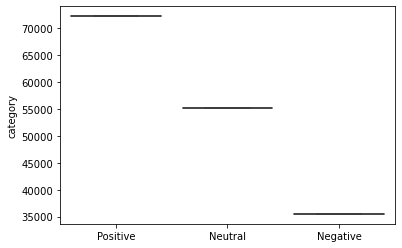

In [49]:
sns.boxplot(x=sentiment_counts.index,y= category_counts)

<AxesSubplot:ylabel='category'>

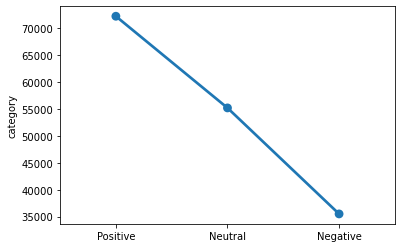

In [51]:
sns.pointplot(x=sentiment_counts.index,y= category_counts)

In [55]:
!pip install wordcloud

In [ ]:
# from wordcloud import WordCloud

# text = ' '.join(df['clean_text'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [56]:
from scipy.stats import chi2_contingency

# Null hypothesis: the two categorical variables are independent.
# Alternate hypothesis: the two categorical variables are dependent.
contingency_table = pd.crosstab(df['category'], df['sentiment_label'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
if p_val<0.05:
    print("Reject the null hypothesis")

Chi-Square Statistic: 325938.00000000006
P-value: 0.0
Reject the null hypothesis


### Defining Independent and Dependent variables

In [57]:
x=df['clean_text']
y=df['category']

### Splitting data for training and testing

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [60]:
print("Total length of the dataset: ",len(df))
print("Total length of training data: ",len(X_train))
print("Total length of testing data: ",len(X_test))

Total length of the dataset:  162969
Total length of training data:  130375
Total length of testing data:  32594


In [61]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [62]:
classifier1 = MultinomialNB()
classifier1.fit(X_train_vec, y_train)

MultinomialNB()

In [145]:
y_pred_nav = classifier1.predict(X_test_vec)

In [146]:
accuracy1 = accuracy_score(y_test, y_pred_nav)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.6555194207522856


In [147]:
print(classification_report(y_test, y_pred_nav))

              precision    recall  f1-score   support

        -1.0       0.83      0.35      0.49      7152
         0.0       0.87      0.47      0.61     11067
         1.0       0.58      0.95      0.72     14375

    accuracy                           0.66     32594
   macro avg       0.76      0.59      0.61     32594
weighted avg       0.73      0.66      0.63     32594



In [148]:
confusion_matrix(y_test, y_pred_nav)

array([[ 2475,   369,  4308],
       [  214,  5225,  5628],
       [  281,   428, 13666]], dtype=int64)

In [150]:
def plot(y_true, y_pred_nav):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_nav), columns=column, index=indices)
    
    return table

In [151]:
plot(y_test,y_pred_nav)

,Predicted-1.0,Predicted0.0,Predicted1.0
Actual-1.0,2475,369,4308
Actual0.0,214,5225,5628
Actual1.0,281,428,13666


In [152]:
def plot2(y_true, y_pred_nav):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_nav), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

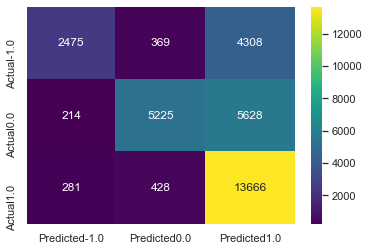

In [153]:
plot2(y_test,y_pred_nav);

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [67]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [68]:
classifier2 = LinearSVC()
classifier2.fit(X_train_vec, y_train)

LinearSVC()

In [100]:
y_pred_svm = classifier2.predict(X_test_vec)


In [101]:
accuracy2 = classifier2.score(X_test_vec, y_test)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.94765907835798


In [105]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

        -1.0       0.92      0.89      0.90      7152
         0.0       0.96      0.98      0.97     11067
         1.0       0.95      0.96      0.95     14375

    accuracy                           0.95     32594
   macro avg       0.94      0.94      0.94     32594
weighted avg       0.95      0.95      0.95     32594



In [106]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test, y_pred_svm)

array([[ 6338,   220,   594],
       [  103, 10818,   146],
       [  426,   217, 13732]], dtype=int64)

In [109]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([-1.,  0.,  1.])

In [110]:
def plot(y_true, y_pred_svm):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_svm), columns=column, index=indices)
    
    return table

In [111]:
plot(y_test,y_pred_svm)

,Predicted-1.0,Predicted0.0,Predicted1.0
Actual-1.0,6338,220,594
Actual0.0,103,10818,146
Actual1.0,426,217,13732


In [114]:
def plot2(y_true, y_pred_svm):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_svm), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

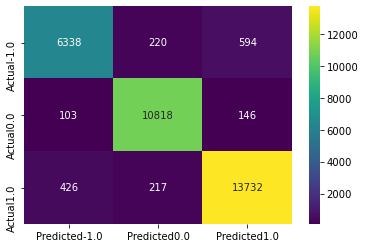

In [115]:
plot2(y_test,y_pred_svm);

In [116]:
from sklearn.linear_model import LogisticRegression

classifier4 = LogisticRegression()
classifier4.fit(X_train_vec, y_train)
y_pred_logistic = classifier4.predict(X_test_vec)

In [117]:
accuracy4 = classifier4.score(X_test_vec, y_test)
print(f"Accuracy: {accuracy4}")

Accuracy: 0.920015953856538


In [140]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

        -1.0       0.92      0.81      0.86      7152
         0.0       0.91      0.98      0.94     11067
         1.0       0.93      0.93      0.93     14375

    accuracy                           0.92     32594
   macro avg       0.92      0.91      0.91     32594
weighted avg       0.92      0.92      0.92     32594



In [154]:
def plot2(y_true, y_pred_logistic):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_logistic), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

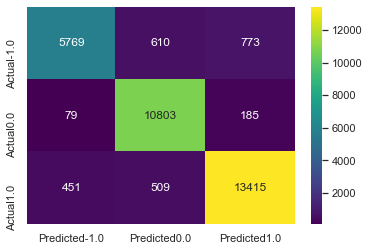

In [155]:
plot2(y_test,y_pred_logistic);

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
classifier3 = DecisionTreeClassifier()
classifier3.fit(X_train_vec, y_train)
y_pred_dec= classifier3.predict(X_test_vec)

In [121]:
accuracy3 = classifier3.score(X_test_vec, y_test)
print(f"Accuracy: {accuracy3}")

Accuracy: 0.8594833404921152


In [157]:
def plot2(y_true, y_pred_dec):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_dec), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

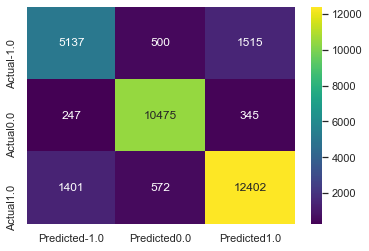

In [158]:
plot2(y_test,y_pred_dec);

In [141]:
print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

        -1.0       0.76      0.72      0.74      7152
         0.0       0.91      0.95      0.93     11067
         1.0       0.87      0.86      0.87     14375

    accuracy                           0.86     32594
   macro avg       0.84      0.84      0.84     32594
weighted avg       0.86      0.86      0.86     32594



In [123]:
from sklearn.ensemble import RandomForestClassifier

classifier6 = RandomForestClassifier()
classifier6.fit(X_train_vec, y_train)
y_pred_random = classifier6.predict(X_test_vec)

In [124]:
accuracy6 = classifier6.score(X_test_vec, y_test)
print(f"Accuracy: {accuracy6}")

Accuracy: 0.8097502607841934


In [143]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

        -1.0       0.93      0.47      0.62      7152
         0.0       0.84      0.88      0.86     11067
         1.0       0.77      0.93      0.84     14375

    accuracy                           0.81     32594
   macro avg       0.84      0.76      0.77     32594
weighted avg       0.83      0.81      0.80     32594



In [160]:
def plot2(y_true, y_pred_random):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_random), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

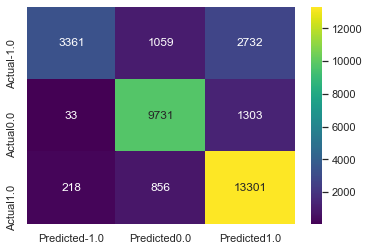

In [161]:
plot2(y_test,y_pred_random);

In [ ]:
plot2(y_test,y_pred_random);

In [127]:
from sklearn.neighbors import KNeighborsClassifier 

classifier5 = KNeighborsClassifier()
classifier5.fit(X_train_vec, y_train)
y_pred_knn = classifier5.predict(X_test_vec)

In [126]:
accuracy5 = classifier5.score(X_test_vec, y_test)
print(f"Accuracy: {accuracy5}")

Accuracy: 0.40265079462477754


In [144]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

        -1.0       0.82      0.08      0.15      7152
         0.0       0.36      0.99      0.53     11067
         1.0       0.91      0.11      0.20     14375

    accuracy                           0.40     32594
   macro avg       0.70      0.39      0.29     32594
weighted avg       0.71      0.40      0.30     32594



In [162]:
def plot2(y_true, y_pred_knn):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred_knn), columns=column, index=indices)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

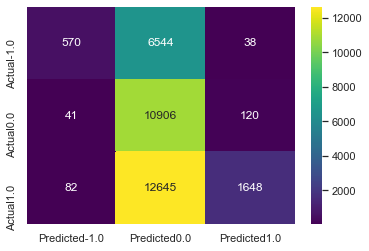

In [163]:
plot2(y_test,y_pred_knn);

In [128]:
model_names = ['Navie Bayes', 'SVM', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'KNN']
accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy6, accuracy5]

In [129]:
data = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_values})

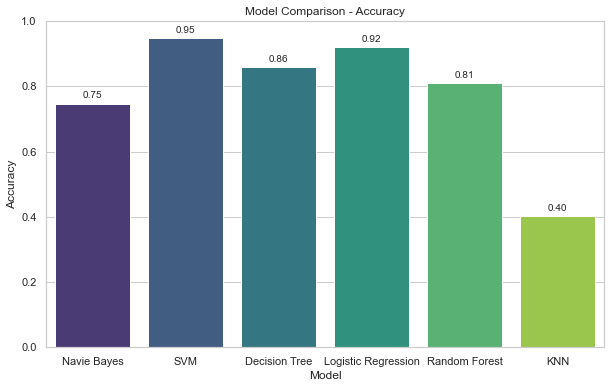

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=data, palette="viridis")
bar_plot.set_title('Model Comparison - Accuracy')
bar_plot.set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Adding values on top of the bars
for index, value in enumerate(accuracy_values):
    bar_plot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

In [167]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='-', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')

plt.legend()
plt.show()

ValueError: multiclass format is not supported

In [131]:
inp="vote modi who has not created jobs"
in1=vectorizer.transform([inp])

In [132]:
ans=classifier2.predict(in1)

In [133]:
pred=round(float(ans))
if pred==1:
    print("Positive")
elif pred==0:
    print("Neutral")
else:
    print("Negetive")

Neutral


In [134]:
import pickle

output_file = 'svm_model.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(classifier2, file)

In [135]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)